# 01 - Feature Selection and Dimentionality Reduction
** Ecole Centrale Nantes **

** Diana Mateus **



PARTICIPANTS: CHAITANYA KRISHNA V

In [25]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 1. Feature Selection


### 1.1 Linear Regression 

**a)** **Creating a toy example dataset** Run the code below to create a dataset with 100 points each described by three features $x_1$, $x_2$ and $x_3$. 

Then, simulate a linear system that given the $i$-th input vector $\mathbf{x}^{(i)}=[x_1^{(i)},x_2^{(i)},x_3^{(i)}]$ provides an output $y^{(i)}$ such that:

$y^{(i)} = b + w_1x_1^{(i)} + w_2x_2^{(i)} + w_3 x_3^{(i)}$. 

To this end, create a target vector with the corresponding target value for the 100 data points above, using as parameters $b=10$ and $w_1=w_2=w_3=1$:

``` python
Y = 10 + w1*x1 + w2*x2 + w3*x3 + noise 
``` 

To simulate a more realistic set-up we add some amount of noise to each of the features and to the target values.

**b)** **Training a linear regression model** Use the scikit learn in-built functions for fiting a linear model to the created dataset 

``model = LinearRegression()``

``model.fit(X,Y)``

The goal is to automatically estimate the parameters $w_1$, $w_2$ and $w_3$ of the linear model from the input matrix $\mathbb{X} = [\mathbf{x_1},\mathbf{x_2},\mathbf{x_3}]$ (obtained by concatenating the input data points as rows of the matrix) and output vector $\mathbb{y}$. 

Look at the documentation to recover the estimated values of the intercept $b$ and coefficient $w_1$, $w_2$, $w_3$ parameters 


**c)** **Evaluating the results** Use the fit model to make predictions on $\mathbb{X}$ and compare visually and quantitatively the original and the estimated target values:
- plot the data points, the ground truth and the estimated lines to see how well they fit.
Hint: plot the target value against each feature dimension separately (3 plots)

``plt.scatter``, ``plt.plot``


- Compute the mean squared error and the r2 variance error between the estimated and the ground truth outputs. Describe your findings

**d)** **Comparing the ground truth vs the estimated model parameters** 
- Compare the values of the original parameters to the estimated ones. Are these the values for the coefficients $w_1$, $w_2$, $w_3$ and the intercept $b$ that you expected?
- What can you say about the contribution of each input feature to the output?
- If the line fits properly to all dimensions why do we get such values?
- Explain  

In [74]:
#a)
from sklearn.linear_model import LinearRegression

size = 100
np.random.seed(seed=5)
 
X_seed = np.random.normal(2, 1, size)
X1 = X_seed + np.random.normal(0, .1, size)
X2 = X_seed + np.random.normal(0, .01, size)
X3 = X_seed + np.random.normal(0, .001, size)
X = np.array([X1, X2, X3]).T


Y = 10 + X1 + X2 + X3 + np.random.normal(0,1, size)

W = np.array([1, 1, 1])

print(X.shape, Y.shape)

(100, 3) (100,)


In [75]:
#b)
lr = LinearRegression()
lr.fit(X,Y)
Yhat = lr.predict(X)
print(lr.coef_)
print(lr.intercept_)

[-1.23939725  7.13540719 -2.8473017 ]
9.869829626394104


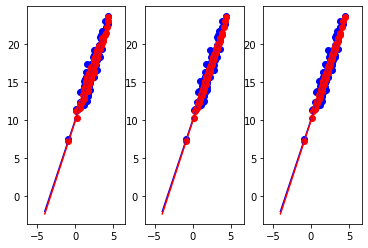

Mean squared error: 0.86
Variance score: 0.89
[-1.23939725  7.13540719 -2.8473017 ]
9.869829626394104


In [76]:
#c)
from sklearn.metrics import mean_squared_error, r2_score

xcoords = np.arange(-4,4,0.5)
pred_line = np.matmul(np.array([xcoords, xcoords, xcoords]).T,lr.coef_) + lr.intercept_
gt_line = 10 + xcoords + xcoords + xcoords

plt.subplot(131)
plt.scatter(X[:,0], Y, color='blue')
plt.scatter(X[:,0], Yhat, color='red', linewidth=1)
plt.plot(xcoords, gt_line, color='blue')
plt.plot(xcoords, pred_line, color='red')
plt.axis('equal')

plt.subplot(132)
plt.scatter(X[:,1], Y, color='blue')
plt.scatter(X[:,1], Yhat, color='red', linewidth=1)
plt.plot(xcoords, gt_line, color='blue')
plt.plot(xcoords, pred_line, color='red')
plt.axis('equal')

plt.subplot(133)
plt.scatter(X[:,2], Y, color='blue')
plt.scatter(X[:,2], Yhat, color='red', linewidth=1)
plt.plot(xcoords, gt_line, color='blue')
plt.plot(xcoords, pred_line, color='red')
plt.axis('equal')

plt.show()

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Yhat, Y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Yhat, Y))

print(lr.coef_.T)
print(lr.intercept_)

**d) Comments:**

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. We have been using Least Squares Regression.

The Variance Square value value is 0.89 , indicating that 89% of the variation in one variable may be explained by the other. 

### 1.2 Ridge and Lasso Regression

a) Using the data from above repeat the regression but fitting this time:
- a ridge model ```Ridge()```
- a Lasso model ```Lasso()```
- an Elastic Net model ```ElasticNet()```

b) Compare the errors (MSE, r2), among the three regularized models.  Use a fixed value of the regularization coefficient ```alpha=0.3``` (here alpha corresponds to $\lambda$ in the lectures). Comment on the results.

c) Plot the estimated coefficients against different values of the Langrangian. Use the following regularization coefficients 
``` python
alphas = np.logspace(-6, 2, 200)
```
d) Mesure the MSE error between the original and estimated parameters for each case. Plot the coefficient error vs alpha.

e) Mesure the MSE error between the ground truth and predicted target for each case. Plot the target error vs alpha.

f) Conclude.

In [77]:
#a) and  #b)
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Ridge Regression

rr = Ridge(alpha=0.03)
rr.fit(X,Y) 
pred_train_rr= rr.predict(X)
print('Mean Squared Error using Ridge Regression is :', np.sqrt(mean_squared_error(Y,pred_train_rr)))
print('R2 Score using Ridge Regression is : ',r2_score(Y, pred_train_rr))


# Lasso Regression

model_lasso = Lasso(alpha=0.03)
model_lasso.fit(X,Y) 
pred_train_lasso= model_lasso.predict(X)
print('Mean Squared Error using Lasso Regression is :',np.sqrt(mean_squared_error(Y,pred_train_lasso)))
print('R2 Score using Lasso Regression is : ',r2_score(Y, pred_train_lasso))


# Elastic Net

model_elastic = ElasticNet(alpha=0.03)
model_elastic.fit(X,Y) 
pred_train_elastic= model_elastic.predict(X)
print('Mean Squared Error using Elastic Net Regression is :',np.sqrt(mean_squared_error(Y,pred_train_elastic)))
print('R2 Score using Elastic Net Regression is : ',r2_score(Y, pred_train_elastic))

Mean Squared Error using Ridge Regression is : 0.9274302184524588
R2 Score using Ridge Regression is :  0.9026237735277801
Mean Squared Error using Lasso Regression is : 0.9362968411825805
R2 Score using Lasso Regression is :  0.9007529578676652
Mean Squared Error using Elastic Net Regression is : 0.9416946584751027
R2 Score using Elastic Net Regression is :  0.8996053269008372


**Comments**

If only prediction is of interest, we will use Lasso over the Ridge but In general if a proper scoring rule here MSE is used, we can see that ridge regression will outperform lasso. The relative performance of the two metrics will depend on the distribution of true regression coefficients. So, I feel that here Ridge performs better than Lasso.

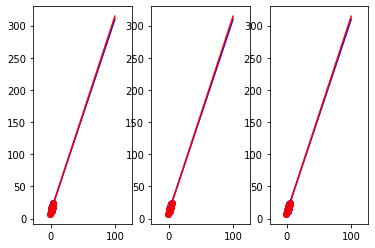

In [31]:
#c) d) e)

alphas = np.logspace(-6, 2, 200)


xcoords = np.logspace(-6, 2, 200)
pred_line = np.matmul(np.array([xcoords, xcoords, xcoords]).T,rr.coef_) + rr.intercept_
gt_line = 10 + xcoords + xcoords + xcoords

plt.subplot(131)
plt.scatter(X[:,0], Y, color='blue')
plt.scatter(X[:,0], Yhat, color='red', linewidth=1)
plt.plot(xcoords, gt_line, color='blue')
plt.plot(xcoords, pred_line, color='red')
plt.axis('equal')

plt.subplot(132)
plt.scatter(X[:,1], Y, color='blue')
plt.scatter(X[:,1], Yhat, color='red', linewidth=1)
plt.plot(xcoords, gt_line, color='blue')
plt.plot(xcoords, pred_line, color='red')
plt.axis('equal')

plt.subplot(133)
plt.scatter(X[:,2], Y, color='blue')
plt.scatter(X[:,2], Yhat, color='red', linewidth=1)
plt.plot(xcoords, gt_line, color='blue')
plt.plot(xcoords, pred_line, color='red')
plt.axis('equal')

plt.show()




**f)** **Conclusions**

The main difference between Lasso and Ridge is the penalty term they use. 

Ridge uses 𝐿2 penalty term which limits the size of the coefficient vector.

Lasso uses 𝐿1 penalty which imposes sparsity among the coefficients and thus, makes the fitted model more interpretable. 

Elasticnet is introduced as a compromise between these two techniques, and has a penalty which is a mix of 𝐿1 and 𝐿2  norms.

Also, Lasso does a sparse selection, while Ridge does not.

### 1.3 Feature selection  for Heart Disease
The dataset ```filtHeartDataSet``` is a filtered version and subset of Heart dataset which contains a binary outcome labels for 299 patients  with chest pain. 
- A positive target value indicates the presence of heart disease based on an angiographic test, 
- while a negative target value means no heart disease. 

The data matrix dataMatrix contains 13 features (measurements) including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements.

See the following link for the full description
http://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Goal**: we will run filter feature selection methods to find and retain only the most predictive input features 

**a)** Run the given code to load and prepare the dataset.

**b)** Run the scikitlearn example for univariate feature selection with f-classif as criteria.

**c)** Modify the example to do feature selection on the Heart Disease dataset. Try other univariate tests. Compare Ridge and Lasso regression results vs the in-built univariate test. 

**d)** Interpret the results in terms of how predictive is each variable of the heart disease condition

In [5]:
#a) HERE THERE IS NOTHING TO DO / UNDERSTAND, just run to load and prepare data
import pandas as pd
# Create Pandas dataframe.
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
df0     = pd.read_table("heart_disease_all14.csv", sep=',', header=None, names=columns)

# Convert categorical variables with more than two values into dummy variables.
# Note that variable ca is discrete but not categorical, so we don't convert it.
df      = df0.copy()
dummies = pd.get_dummies(df["cp"],prefix="cp")
df      = df.join(dummies)
del df["cp"]
del df["cp_4.0"]
df      = df.rename(columns = {"cp_1.0":"cp_1","cp_2.0":"cp_2","cp_3.0":"cp_3"})

dummies = pd.get_dummies(df["restecg"],prefix="recg")
df      = df.join(dummies)
del df["restecg"]
del df["recg_0.0"]
df      = df.rename(columns = {"recg_1.0":"recg_1","recg_2.0":"recg_2"})

dummies = pd.get_dummies(df["slope"],prefix="slope")
df      = df.join(dummies)
del df["slope"]
del df["slope_2.0"]
df      = df.rename(columns = {"slope_1.0":"slope_1","slope_3.0":"slope_3"})

dummies = pd.get_dummies(df["thal"],prefix="thal")
df      = df.join(dummies)
del df["thal"]
del df["thal_3.0"]
df      = df.rename(columns = {"thal_6.0":"thal_6","thal_7.0":"thal_7"})

# Replace response variable values and rename
df["num"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
df      = df.rename(columns = {"num":"hd"})

# New list of column labels after the above operations
new_columns_1 = ["age", "sex", "restbp", "chol", "fbs", "thalach", 
                 "exang", "oldpeak", "ca", "hd", "cp_1", "cp_2",
                 "cp_3", "recg_1", "recg_2", "slope_1", "slope_3",
                 "thal_6", "thal_7"]

print ('\nNumber of patients in dataframe: %i, with disease: %i, without disease: %i\n' \
      % (len(df.index),len(df[df.hd==1].index),len(df[df.hd==0].index)))
print (df.head())
print (df.describe())

# Standardize the dataframe
stdcols = ["age","restbp","chol","thalach","oldpeak"]
nrmcols = ["ca"]
stddf   = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))

new_columns_2 = new_columns_1[:9] + new_columns_1[10:]
new_columns_2.insert(0,new_columns_1[9])
stddf = stddf.reindex(columns=new_columns_2)

# Convert dataframe into lists for use by classifiers
yall = stddf["hd"]
Xall = stddf[new_columns_2[1:]].values


Number of patients in dataframe: 299, with disease: 139, without disease: 160

    age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca   hd  cp_1  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0  0.0     1   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0  1.0     0   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0  1.0     0   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0  0.0     0   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0  0.0     0   

   cp_2  cp_3  recg_1  recg_2  slope_1  slope_3  thal_6  thal_7  
0     0     0       0       1        0        1       1       0  
1     0     0       0       1        0        0       0       0  
2     0     0       0       1        0        0       0       1  
3     0     1       0       0        0        1       0       0  
4     1     0       0       1        1        0       0       0  
              age        sex      restbp        chol         

In [6]:
# b) From Scikit learn example, run and analyse

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif#, mutual_info_classif
iris = load_iris()
X, y = iris.data, iris.target
print('Shape of the input matrix', X.shape)
model = SelectKBest(f_classif, k=2)
model.fit(X,y)
mask = model.get_support()
print('Selected best variables',mask)
X_new=X[:,mask==True]
print('Shape after variable selection',X_new.shape)


Shape of the input matrix (150, 4)
Selected best variables [False False  True  True]
Shape after variable selection (150, 2)


In [ ]:
# c) Run univariate feature selection with univariate tests, Ridge and Lasso Feature selection on Heart Disease dataset


## Optional

** d) Comments**


1.3 is an optional exercise

## 2. Principal Component Analysis

### 2.1. PCA demo with point cloud
Run and analyse the demo code

Explained variance [0.7625315 0.0184779]
PCA components
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


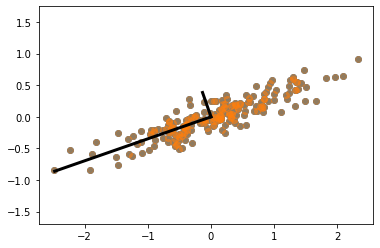

In [87]:
from sklearn.decomposition import PCA

#Generating the data
np.random.seed(1)
X = np.matmul(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

#Apply PCA
pca = PCA(n_components=2)
pca.fit(X)
print('Explained variance', pca.explained_variance_)
print('PCA components\n',pca.components_)

#Plot principal components
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');
plt.show()

### 2.2 Own PCA implementation 
Make your own implementation of the PCA algorithm and compare your results with the above

To implement PCA follow the steps bellow
- Demean the data (mean=0).
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix (Equivalently do Singular Vector Decomposition on the data Matrix). 
``` np.linalg.eig(cov_mat)```
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues. Remember k is the number of dimensions of the new feature subspace (k ≤ D)
- Construct the projection matrix T from the selected k eigenvectors.
- Transform the original dataset X via T to obtain a k dimensional feature subspace Z

Your results should be equivalent to the above, explain any difference.

In [113]:
#Generating the data
np.random.seed(1)
X = np.matmul(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
# plt.plot(X[:, 0], X[:, 1], 'o')
# plt.axis('equal');


# Own PCA function
from scipy import linalg as LA

def PCA_OWN(data, dim=2):
    m, n = data.shape
    # Step 1 : mean center the data
    data -= data.mean(axis=0)
    # Step 2 : calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # Step 2.1 : calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # Step 3 : sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # Step 3.1 : sort eigenvectors according to same index
    evals = evals[idx]
    # Step 4 : select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dim]
    # Step 5 : carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return evals, evecs


PCA_OWN(X,2)

(array([0.7625315, 0.0184779]),
 array([[-0.94446029,  0.32862557],
        [-0.32862557, -0.94446029]]))

#### We have the exact same results with PCA function.

### 2.3 PCA on digits dataset

Apply PCA (yours or the in-built version) on the load_digits dataset
```
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

```

**a)** Visualize some of the images for each target value.

**b)** Apply PCA to reduce the dimensionality of each vectorized image (1,64) to just 2 dimensions. Plot the projected dataset with a scatter plot in two dimensions, using the labels to color. Comment.

Hint for plotting:
``` python
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', 
            alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();
```

**c)** Visualize the cumulative explained variance vs the the number of retained dimensions

**d)** For 3 different input images (from different target values) 
- recostruct and show the full 8x8 image from its 1x2 low-dimensional representation.
Hint: Use ```pca.inverse_transform```, 

- show how the aspect of the reconstructed image changes when increasing the number of retained dimensions.

**e)** what does the inverse_transformation function do?


Original size (1797, 64)


<Figure size 432x288 with 0 Axes>

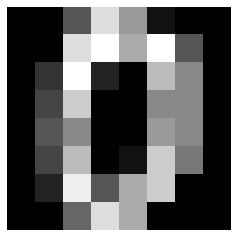

In [61]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print('Original size',X.shape)


plt.gray() 
plt.matshow(digits.images[0]) 
plt.axis('off')
plt.show() 


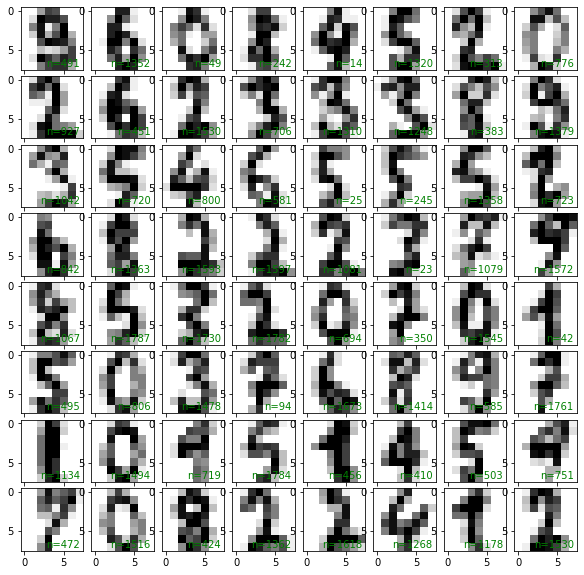

In [48]:
# a) Visualize 

fig, axes = plt.subplots(8,8, figsize = (10,10))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in enumerate(axes.flat):
    r = np.random.randint(1,X.shape[0])
    im = X[r,:]
    ax.imshow(im.reshape((8,8)), cmap = 'binary')
    ax.text(0.95, 0.05, 'n={0}'.format(r), ha = 'right', transform = ax.transAxes, color = 'green')
plt.show()

(1797, 64)
(1797, 2)


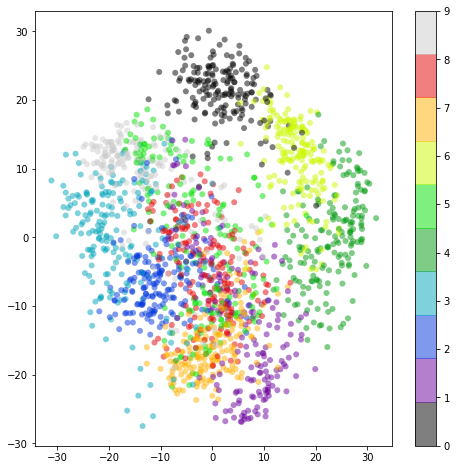

In [13]:
# b) Reduce dimensionality
plt.subplots(figsize=(8,8))
pca = PCA(2)
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)
plt.scatter(Xproj[:,0], Xproj[:,1], c=y, edgecolor = 'none', alpha = 0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();
plt.show()

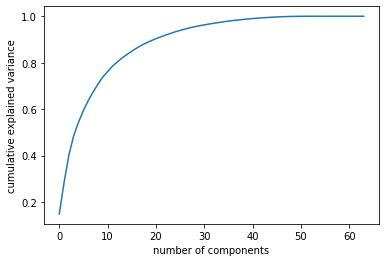

In [58]:
# c) Variance vs dimension
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

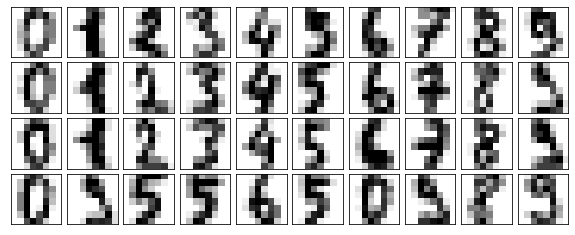

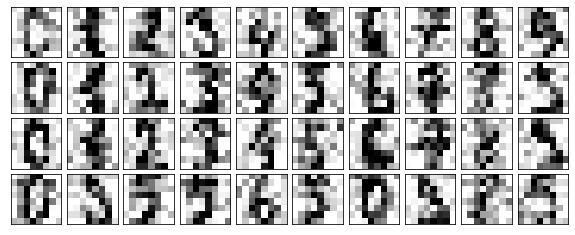

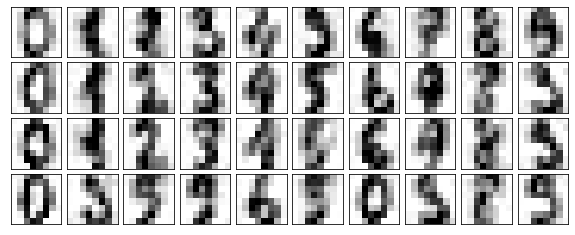

In [65]:
# d) Show reconstructed images for different values of retained dimensions

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

# Add noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

# Preserving the variance by 50 percent
pca = PCA(0.50).fit(noisy)
pca.n_components_

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#### e.  PCA transform returns to original data only if the number of components is the same as the dimensionality of the input data. For any n_components less than this, we will get different numbers than the original dataset after applying the inverse PCA transformation.

#### Other Dimensionality Reducting Routines

Note that scikit-learn contains many other unsupervised dimensionality reduction routines. Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths and weaknesses, see more on the [scikit-learn website](http://sklearn.org).

** BONUS ** 

Try the PCA reduction on a faces dataset

* https://www.kaggle.com/lalitharajesh/face-recognition-eigenfaces
* https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/
* https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
* http://featureselection.asu.edu/index.php

In [66]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Remark : We use Randomised PCA, which is the same technique for improving the neuro intervention tools as seen in the last TP of ATRIM in a research paper

In [68]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

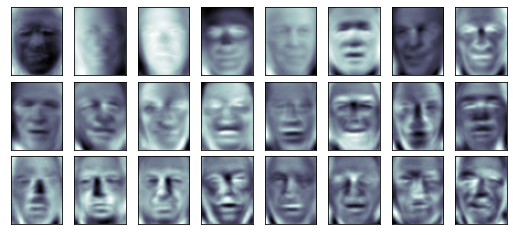

In [69]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

### We do the same as we did for digits dataset, we plot the Number of Components vs Cumulative Explained Variance

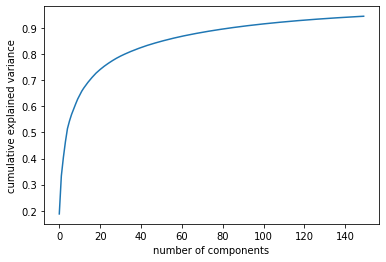

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [71]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

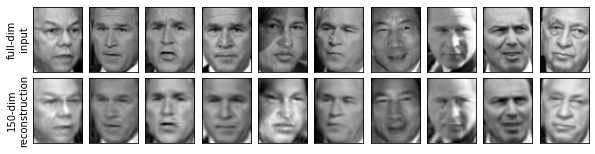

In [72]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');